## Which of the following have impacts a player's rank the most? Rebounds, Assists, Steals or Blocks?
### 2700 Final Project - Ariela Gettig and Travis Zhang

To solve this problem, we will use linear regression and find the correlation coefficient for each of the results. At the bottom, we have included a summary of our results.

In [106]:
# import needed packages
import pandas as pd
import numpy as np
from sklearn import linear_model
import requests
from nba_api.stats import endpoints
from matplotlib import pyplot as plt

In [107]:
# connect to NBA API
data = endpoints.leagueleaders.LeagueLeaders() 

# retrieve data for League Leaders
df = data.league_leaders.get_data_frame()   

In [108]:
# create model for each data set with inputs and output graph
def graph(x,y,title,xlabel):
    x = np.array(x).reshape(-1,1)    
    y = np.array(y).reshape(-1,1)    
                                      
    model = linear_model.LinearRegression()    
    model.fit(x,y)                             

    r2 = round(model.score(x,y), 2)            
    predicted_y = model.predict(x)             

    plt.scatter(x, y, s=15, alpha=.5)                            
    plt.plot(x, predicted_y, color = 'black')                  
    plt.title(title)
    plt.xlabel(xlabel)                                  
    plt.ylabel('Rank')                              
    plt.text(0,0, f'R2={r2}')                                 
    plt.show()

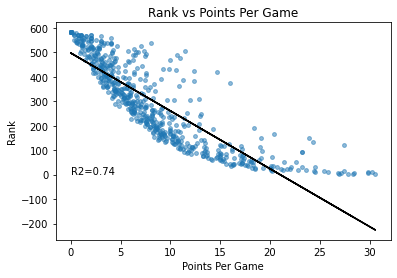

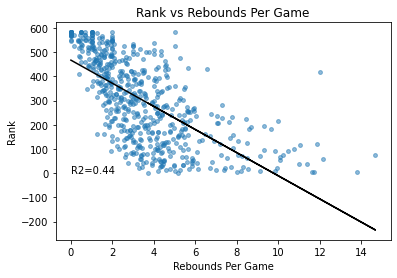

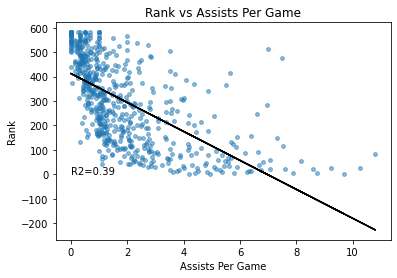

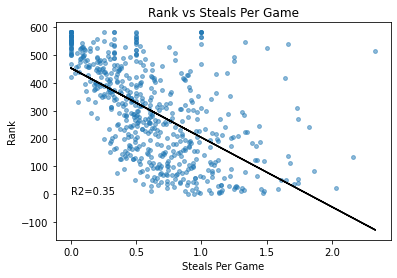

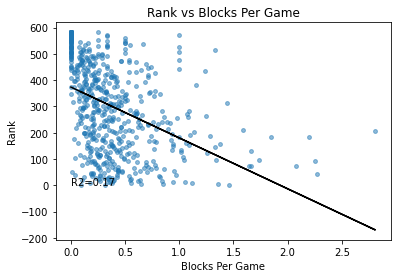

In [109]:
pts = df.PTS/df.GP # points per game
rb = df.REB/df.GP  # rebounds per game
ast = df.AST/df.GP # assists per game
slt = df.STL/df.GP # steals per game
blk = df.BLK/df.GP # blocks per game
y = df.RANK # players' ranks

# output graphs for each category
graph(pts,y,'Rank vs Points Per Game', 'Points Per Game')
graph(rb,y,'Rank vs Rebounds Per Game', 'Rebounds Per Game')
graph(ast,y,'Rank vs Assists Per Game', 'Assists Per Game')
graph(slt,y,'Rank vs Steals Per Game', 'Steals Per Game')
graph(blk,y,'Rank vs Blocks Per Game', 'Blocks Per Game')